# CMB Shape Analysis and Location

This notebook enriches CMB metadata with shape and intensity features computed with radiomics

Then also inspects locations

In [14]:
import os
import sys
import argparse
import traceback


import logging
import numpy as np
import  ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cmbnet.utils.utils_plotting as utils_plotting


pd.set_option('display.max_column', None)
BRAIN_LABELS = set(
    [
        2,  # left cerebral white matter
        3,  # left cerebral cortex
        7,  # left cerebellum white matter
        8,  # left cerebellum cortex
        10,  # left thalamus
        11,  # left caudate
        12,  # left putamen
        13,  # left pallidum
        17,  # left hippocampus
        18,  # left amygdala
        26,  # left accumbens area
        28,  # left ventral DC (Diencephalon)
        41,  # right cerebral white matter
        42,  # right cerebral cortex
        46,  # right cerebellum white matter
        47,  # right cerebellum cortex
        49,  # right thalamus
        50,  # right caudate
        51,  # right putamen
        52,  # right pallidum
        53,  # right hippocampus
        54,  # right amygdala
        58,  # right accumbens area
        60,  # right ventral DC (Diencephalon)
    ]
)
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_colwidth', None)  # Display full column width

In [15]:
all_meta_path = "../../data-misc/csv/CMB_metadata_all.csv"
csv_metadata_radiomics = "../../data-misc/csv/CMB_radiomics_metadata.csv"

In [16]:
df_cmb_metadata = pd.read_csv(all_meta_path)
df_cmb_metadata_radiomics = pd.read_csv(csv_metadata_radiomics)
df_cmb_metadata_radiomics['CM'] = df_cmb_metadata_radiomics['CM'].apply(lambda x: list(ast.literal_eval(x)))
df_cmb_metadata_radiomics['CM'] = df_cmb_metadata_radiomics['CM'].astype(str)
df_cmb_metadata['CM'] = df_cmb_metadata['CM'].astype(str)
df_cmb_metadata_radiomics.head(2)

/tmp/ipykernel_3663647/2459987675.py:1: DtypeWarning: Columns (7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cmb_metadata = pd.read_csv(all_meta_path)


,seriesUID,CM,shape_Elongation,shape_Flatness,shape_LeastAxisLength,shape_MajorAxisLength,shape_Maximum2DDiameterColumn,shape_Maximum2DDiameterRow,shape_Maximum2DDiameterSlice,shape_Maximum3DDiameter,shape_MeshVolume,shape_MinorAxisLength,shape_Sphericity,shape_SurfaceArea,shape_SurfaceVolumeRatio,shape_VoxelVolume,firstorder_10Percentile,firstorder_90Percentile,firstorder_Energy,firstorder_Entropy,firstorder_InterquartileRange,firstorder_Kurtosis,firstorder_Maximum,firstorder_MeanAbsoluteDeviation,firstorder_Mean,firstorder_Median,firstorder_Minimum,firstorder_Range,firstorder_RobustMeanAbsoluteDeviation,firstorder_RootMeanSquared,firstorder_Skewness,firstorder_TotalEnergy,firstorder_Uniformity,firstorder_Variance,count_dict,com_label
0,RODEJA-00042-CMB-31,"[31, 142, 169]",0.484461,0.410174,2.705284,6.595453,7.071068,3.905125,7.28011,7.433034,38.213542,3.195240,0.764235,71.790785,1.878674,39.50,5151.023682,47499.623047,2.728894e+11,8.144715,26888.903564,2.101111,70125.070312,14185.036958,24414.676114,21874.318359,366.257568,69758.812744,11279.989864,29386.628478,0.441881,3.411117e+10,0.003705,2.674975e+08,"{0.0: 40044044, 3.0: 209, 24.0: 107}",24.0
1,RODEJA-00042-CMB-31,"[37, 183, 145]",0.753416,0.508102,2.211258,4.351997,4.716991,4.716991,5.09902,5.123475,14.031250,3.278864,0.629948,44.659159,3.182835,15.25,7026.095752,42926.772266,1.071508e+11,6.881557,20325.456055,2.536481,67903.054688,11666.154417,26144.913739,25408.271484,250.608276,67652.446411,8579.882629,29635.882352,0.187757,1.339385e+10,0.008600,1.947290e+08,"{0.0: 40044238, 2.0: 110, 3.0: 12}",2.0


In [17]:
df_radiomics = df_cmb_metadata_radiomics
df_radiomics = df_cmb_metadata.merge(df_cmb_metadata_radiomics, on=['seriesUID', 'CM'], how='inner')
df_radiomics.head(2)

,seriesUID,cmb_id,CM,size,radius,processed_id,RB_label,Location,Multiple,<5mm,Cause,Uncertain,Other,seq_type,res_level,field_strength,TE,subject,patientUID,Dataset,shape_Elongation,shape_Flatness,shape_LeastAxisLength,shape_MajorAxisLength,shape_Maximum2DDiameterColumn,shape_Maximum2DDiameterRow,shape_Maximum2DDiameterSlice,shape_Maximum3DDiameter,shape_MeshVolume,shape_MinorAxisLength,shape_Sphericity,shape_SurfaceArea,shape_SurfaceVolumeRatio,shape_VoxelVolume,firstorder_10Percentile,firstorder_90Percentile,firstorder_Energy,firstorder_Entropy,firstorder_InterquartileRange,firstorder_Kurtosis,firstorder_Maximum,firstorder_MeanAbsoluteDeviation,firstorder_Mean,firstorder_Median,firstorder_Minimum,firstorder_Range,firstorder_RobustMeanAbsoluteDeviation,firstorder_RootMeanSquared,firstorder_Skewness,firstorder_TotalEnergy,firstorder_Uniformity,firstorder_Variance,count_dict,com_label
0,RODEJA-00058-CMB-2,0,"[78, 95, 51]",30,1.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SWI,high,1.5/3,NaN,00058,00058,RODEJA,0.410832,0.327655,1.139536,3.477858,4.031129,2.00000,4.031129,4.031129,3.062500,1.428817,0.723781,14.090535,4.600991,3.75,1229.358655,6729.115723,5.909592e+08,4.773557,3107.904755,3.890381,10877.576172,2046.086707,3614.341408,2615.416748,637.118408,10240.457764,1416.872709,4438.314859,1.213744,7.386990e+07,0.037778,6.635175e+06,"{0.0: 27613410, 7.0: 29, 8.0: 1}",7.0
1,RODEJA-00058-CMB-2,1,"[83, 72, 150]",64,2.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SWI,high,1.5/3,NaN,00058,00058,RODEJA,0.563239,0.385547,1.470731,3.814664,4.123106,2.54951,4.123106,4.301163,7.276042,2.148568,0.756085,24.016522,3.300768,8.00,380.856476,6765.001807,1.176765e+09,5.812500,4384.813477,1.939050,9502.495117,2210.359214,3479.062860,3744.123291,69.665451,9432.829666,1796.964899,4288.001944,0.262638,1.470957e+08,0.018555,6.283082e+06,"{0.0: 27613376, 2.0: 40, 3.0: 24}",3.0


In [18]:
df_radiomics.groupby('Dataset').size()

Dataset
CRB       127
DOU        74
MOMENI    146
RODEJA    357
VALDO     253
dtype: int64

# Plots

In [19]:
for col in df_radiomics.columns:
    print(col)

seriesUID
cmb_id
CM
size
radius
processed_id
RB_label
Location
Multiple
<5mm
Cause
Uncertain
Other
seq_type
res_level
field_strength
TE
subject
patientUID
Dataset
shape_Elongation
shape_Flatness
shape_LeastAxisLength
shape_MajorAxisLength
shape_Maximum2DDiameterColumn
shape_Maximum2DDiameterRow
shape_Maximum2DDiameterSlice
shape_Maximum3DDiameter
shape_MeshVolume
shape_MinorAxisLength
shape_Sphericity
shape_SurfaceArea
shape_SurfaceVolumeRatio
shape_VoxelVolume
firstorder_10Percentile
firstorder_90Percentile
firstorder_Energy
firstorder_Entropy
firstorder_InterquartileRange
firstorder_Kurtosis
firstorder_Maximum
firstorder_MeanAbsoluteDeviation
firstorder_Mean
firstorder_Median
firstorder_Minimum
firstorder_Range
firstorder_RobustMeanAbsoluteDeviation
firstorder_RootMeanSquared
firstorder_Skewness
firstorder_TotalEnergy
firstorder_Uniformity
firstorder_Variance
count_dict
com_label


/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

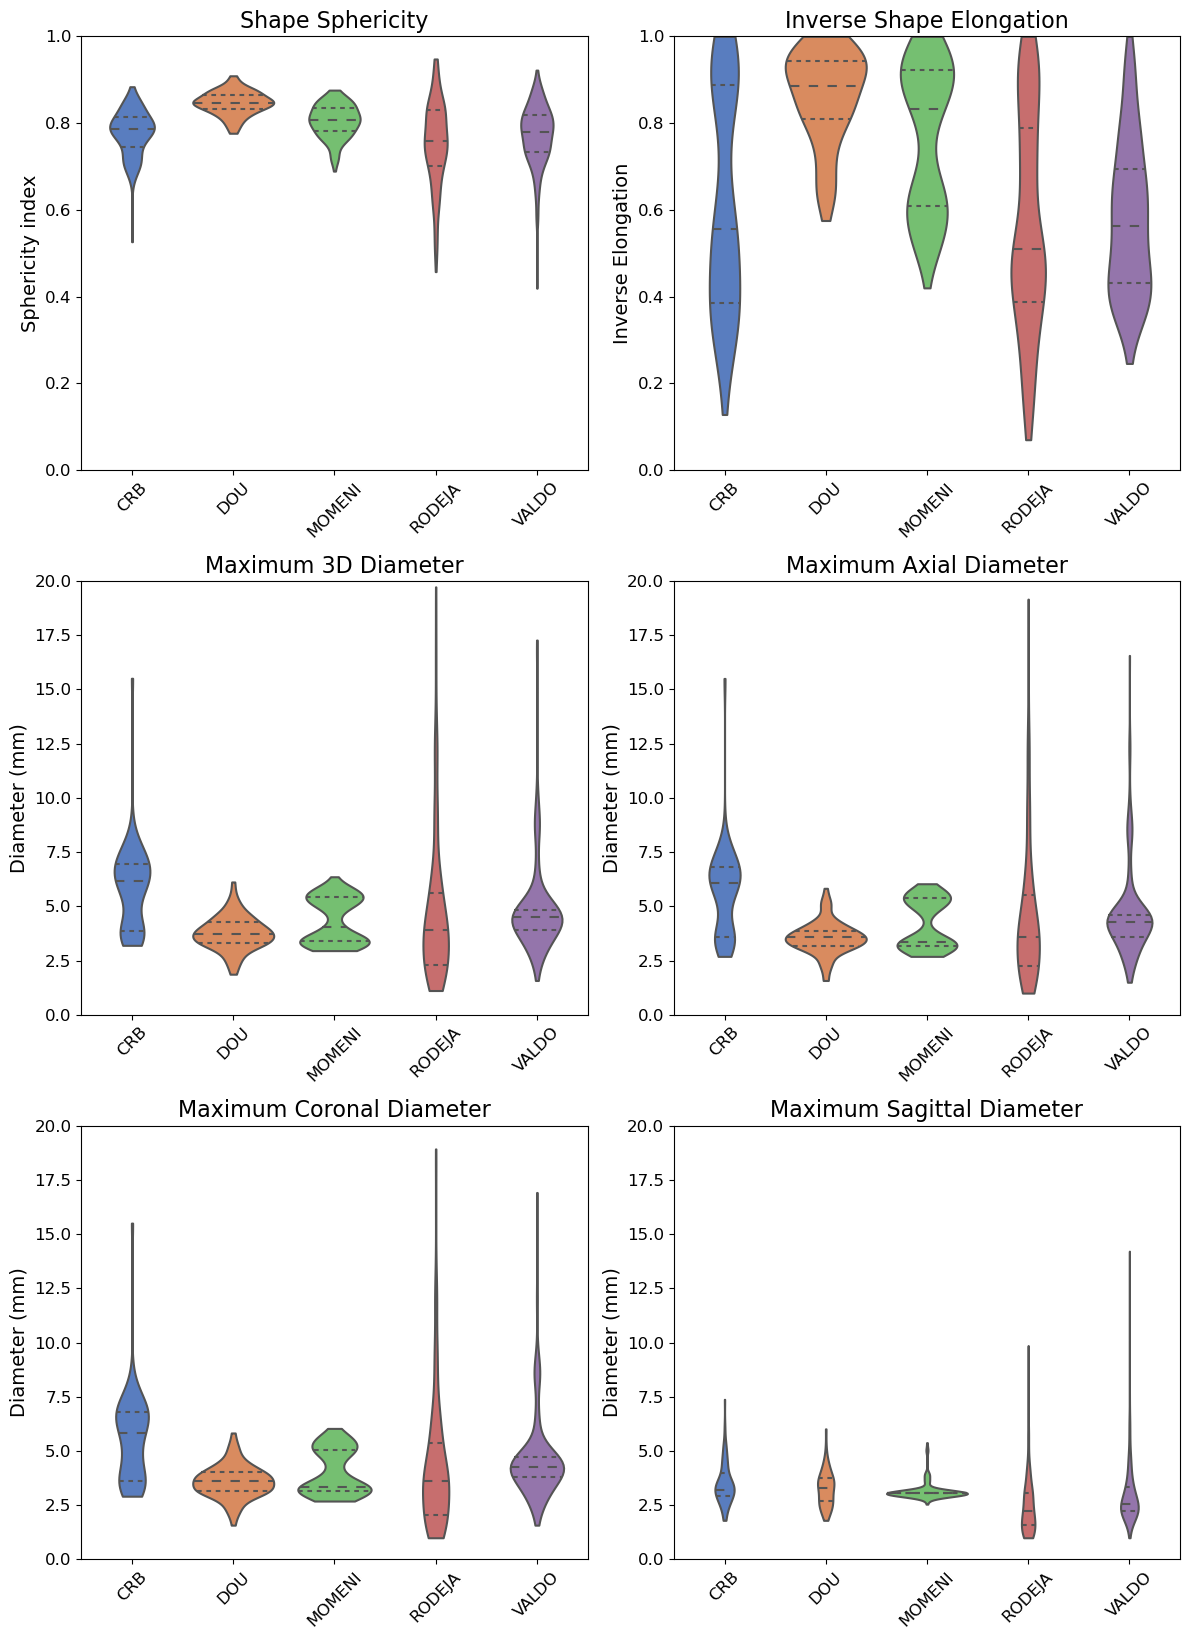

In [20]:
# Example usage
fig, axs = plt.subplots(3, 2, figsize=(12, 17))  # Increase the figure size for better visibility

# title = fig.suptitle('Shape Features by Dataset', fontsize=20, verticalalignment='top')
# fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect to provide space under the title
# fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect to provide space under the title


# Plotting each feature
utils_plotting.create_violin_plot(
    ax=axs[0, 0],
    data=df_radiomics.sort_values('Dataset'),
    column='shape_Sphericity',
    group_by='Dataset',
    title='Shape Sphericity',
    xlabel='',
    ylabel='Sphericity index',
    y_lim=(0, 1),
)

utils_plotting.create_violin_plot(
    ax=axs[0, 1],
    data=df_radiomics.sort_values('Dataset'),
    column='shape_Elongation',
    group_by='Dataset',
    title='Inverse Shape Elongation',
    xlabel='',
    ylabel='Inverse Elongation',
    y_lim=(0, 1),
)

utils_plotting.create_violin_plot(
    ax=axs[1, 0],
    data=df_radiomics.sort_values('Dataset'),
    column='shape_Maximum3DDiameter',
    group_by='Dataset',
    title='Maximum 3D Diameter',
    xlabel='',
    ylabel='Diameter (mm)',
    y_lim=(0, 20),
)

utils_plotting.create_violin_plot(
    ax=axs[1, 1],
    data=df_radiomics.sort_values('Dataset'),
    column='shape_Maximum2DDiameterSlice',
    group_by='Dataset',
    title='Maximum Axial Diameter',
    xlabel='',
    ylabel='Diameter (mm)',
    y_lim=(0, 20),
)
utils_plotting.create_violin_plot(
    ax=axs[2, 0],
    data=df_radiomics.sort_values('Dataset'),
    column='shape_Maximum2DDiameterColumn',
    group_by='Dataset',
    title='Maximum Coronal Diameter',
    xlabel='',
    ylabel='Diameter (mm)',
    y_lim=(0, 20),
)

utils_plotting.create_violin_plot(
    ax=axs[2, 1],
    data=df_radiomics.sort_values('Dataset'),
    column='shape_Maximum2DDiameterRow',
    group_by='Dataset',
    title='Maximum Sagittal Diameter',
    xlabel='',
    ylabel='Diameter (mm)',
    y_lim=(0, 20),
)

fig.tight_layout(rect=[0, 0, 1, 0.97])   # Fine-tune the rect parameter if needed

# Adjust layout and display plot
plt.savefig("../../data-misc/img/radiomics_features_by_dataset.png")
plt.show()


/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

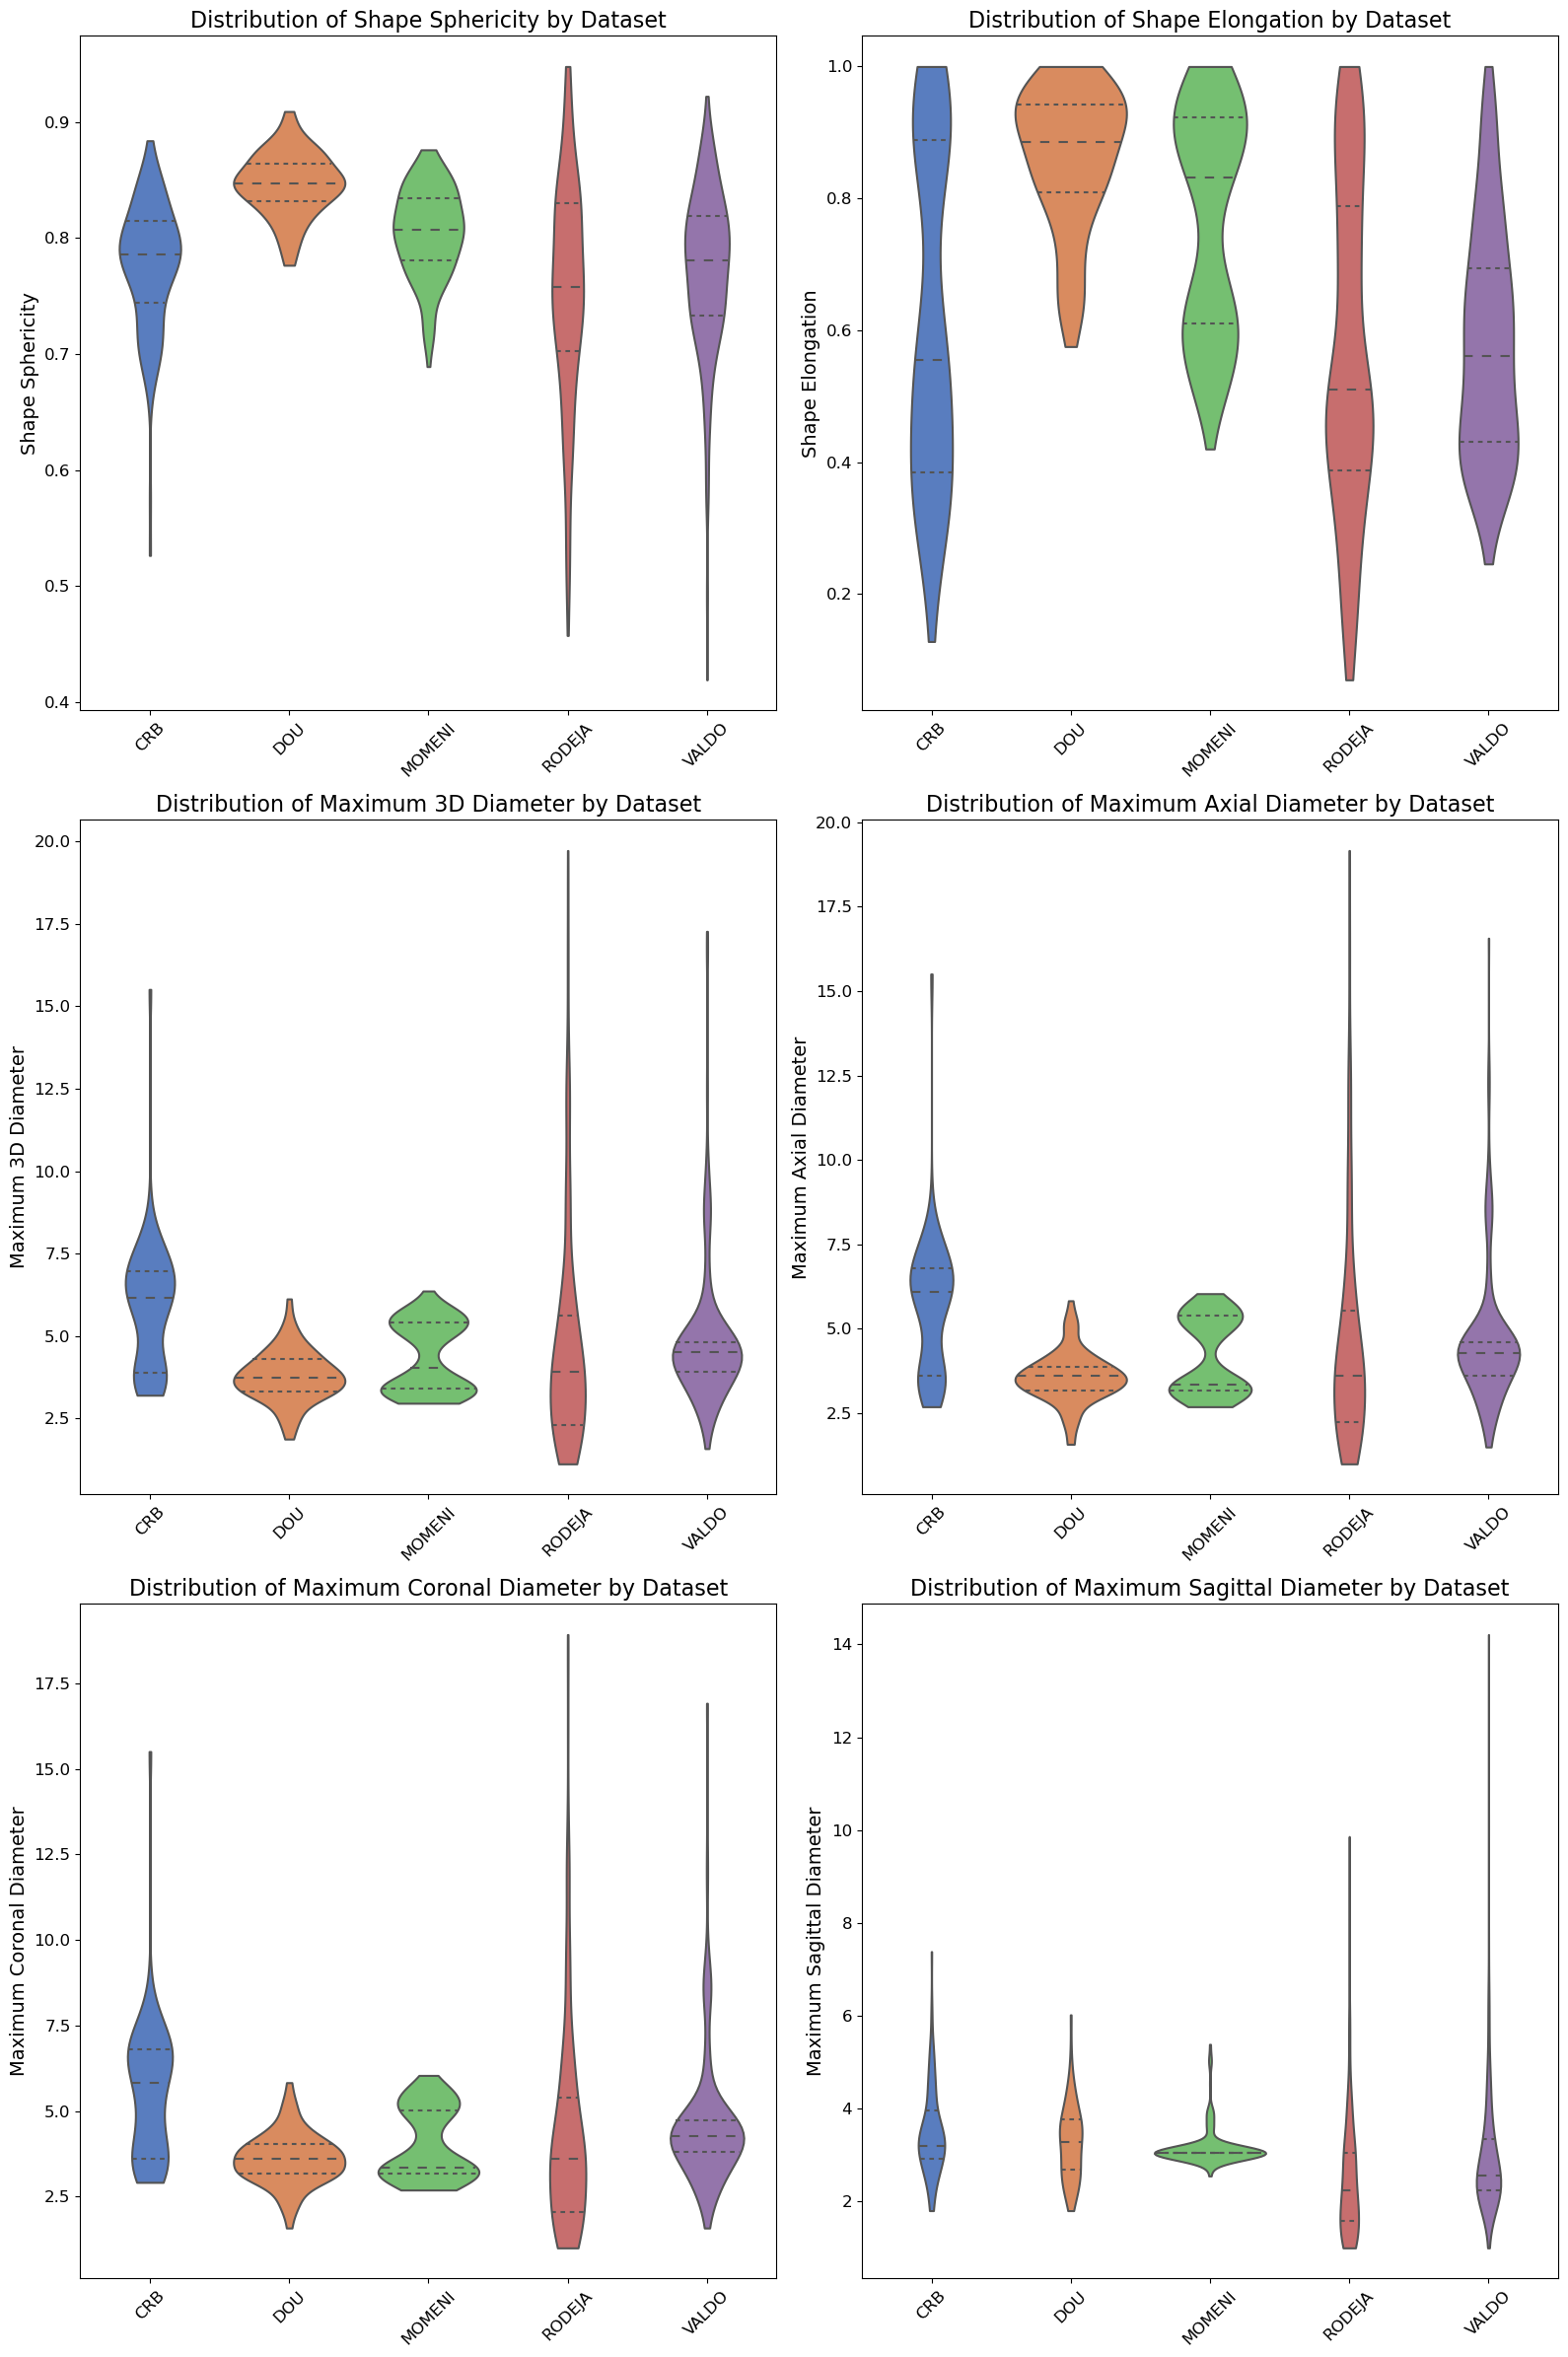

In [21]:
# Example usage
fig, axs = plt.subplots(3, 2, figsize=(16, 24))  # Increase the figure size for better visibility

# Plotting each feature
utils_plotting.create_violin_plot(
    ax=axs[0, 0],
    data=df_radiomics.sort_values('Dataset'),
    column='shape_Sphericity',
    group_by='Dataset',
    title='Distribution of Shape Sphericity by Dataset',
    xlabel='',
    ylabel='Shape Sphericity'
)

utils_plotting.create_violin_plot(
    ax=axs[0, 1],
    data=df_radiomics.sort_values('Dataset'),
    column='shape_Elongation',
    group_by='Dataset',
    title='Distribution of Shape Elongation by Dataset',
    xlabel='',
    ylabel='Shape Elongation'
)

utils_plotting.create_violin_plot(
    ax=axs[1, 0],
    data=df_radiomics.sort_values('Dataset'),
    column='shape_Maximum3DDiameter',
    group_by='Dataset',
    title='Distribution of Maximum 3D Diameter by Dataset',
    xlabel='',
    ylabel='Maximum 3D Diameter'
)

utils_plotting.create_violin_plot(
    ax=axs[1, 1],
    data=df_radiomics.sort_values('Dataset'),
    column='shape_Maximum2DDiameterSlice',
    group_by='Dataset',
    title='Distribution of Maximum Axial Diameter by Dataset',
    xlabel='',
    ylabel='Maximum Axial Diameter'
)
utils_plotting.create_violin_plot(
    ax=axs[2, 0],
    data=df_radiomics.sort_values('Dataset'),
    column='shape_Maximum2DDiameterColumn',
    group_by='Dataset',
    title='Distribution of Maximum Coronal Diameter by Dataset',
    xlabel='',
    ylabel='Maximum Coronal Diameter'
)

utils_plotting.create_violin_plot(
    ax=axs[2, 1],
    data=df_radiomics.sort_values('Dataset'),
    column='shape_Maximum2DDiameterRow',
    group_by='Dataset',
    title='Distribution of Maximum Sagittal Diameter by Dataset',
    xlabel='',
    ylabel='Maximum Sagittal Diameter'
)


# Adjust layout and display plot
plt.tight_layout()
plt.savefig("../../data-misc/img/CMB_diameters_by_dataset.png")
plt.show()


# CMB location

In [22]:
# Function to read SynthSeg labels
import cmbnet.utils.utils_evaluation as utils_eval

In [23]:
synth_labels  = utils_eval.read_synthseg_labels()
synth_labels

{0: 'background',
 2: 'left cerebral white matter',
 3: 'left cerebral cortex',
 4: 'left lateral ventricle',
 5: 'left inferior lateral ventricle',
 7: 'left cerebellum white matter',
 8: 'left cerebellum cortex',
 10: 'left thalamus',
 11: 'left caudate',
 12: 'left putamen',
 13: 'left pallidum',
 14: '3rd ventricle',
 15: '4th ventricle',
 16: 'brain-stem',
 17: 'left hippocampus',
 18: 'left amygdala',
 26: 'left accumbens area',
 24: 'CSF',
 28: 'left ventral DC',
 41: 'right cerebral white matter',
 42: 'right cerebral cortex',
 43: 'right lateral ventricle',
 44: 'right inferior lateral ventricle',
 46: 'right cerebellum white matter',
 47: 'right cerebellum cortex',
 49: 'right thalamus',
 50: 'right caudate',
 51: 'right putamen',
 52: 'right pallidum',
 53: 'right hippocampus',
 54: 'right amygdala',
 58: 'right accumbens area',
 60: 'right ventral DC'}

In [24]:
synthseg_mappings = utils_eval.read_synth2BOMBs_mappings()
# get unique fomr each bombs value for col label
synthseg_mappings

,labels,highlevel_location,BOMBS,COMMENT
0,left caudate,deep,Basal ganglia grey matter,NaN
1,left putamen,deep,Basal ganglia grey matter,NaN
2,left pallidum,deep,Basal ganglia grey matter,NaN
3,3rd ventricle,deep,Basal ganglia grey matter,Best guess assigned
4,left accumbens area,deep,Basal ganglia grey matter,NaN
5,right caudate,deep,Basal ganglia grey matter,NaN
6,right putamen,deep,Basal ganglia grey matter,NaN
7,right pallidum,deep,Basal ganglia grey matter,NaN
8,right accumbens area,deep,Basal ganglia grey matter,NaN
9,brain-stem,deep,Brainstem,NaN


In [25]:
df_location = df_radiomics[
    [
        "seriesUID",
        "cmb_id",
        "CM",
        "size",
        "radius",
        "processed_id",
        "RB_label",
        "Location",
        "Multiple",
        "<5mm",
        "Cause",
        "Uncertain",
        "Other",
        "seq_type",
        "res_level",
        "field_strength",
        "TE",
        "subject",
        "patientUID",
        "Dataset",
        "count_dict",
        "com_label",
    ]
]

In [26]:
df_location_enriched = utils_eval.add_location(df_location, Isdfloaded=False)

In [27]:
# def get_max_key(x: pd.Series):
    
#     x = ast.literal_eval(x)
    
#     # Check if there is any non-brain region
#     x_filt = {k: v for k, v in x.items() if k in BRAIN_LABELS}
#     if len(x_filt) > 0:
#         x = x_filt
#     if 0 in x and len(x) > 1:
#         x.pop(0)
#     if 24 in x and len(x) > 1:
#         x.pop(24)

#     # ignore the key with the value 0
#     max_key = max(x, key=x.get) 
    
#     # if is cortex but also white matter present, then choose white matter
#     if max_key in [3, 42]:
#         # get second max key
#         if len(x) > 1:
#             x.pop(max_key)
#             try:
#                 second_max_key = max(x, key=x.get)
#                 if second_max_key in [2, 41]:
#                     max_key = second_max_key
#             except:
#                 print(x)
       
#     return max_key

# def get_percentages(x: pd.Series):
    
#     x = ast.literal_eval(x)
    
#     if len(x) > 1:
#         x.pop(0)
#     # get percentages of total
#     total = sum(x.values())
#     x = {k: v/total for k, v in x.items()}
#     return x

# def get_synthlabel_names(x: pd.Series, synth_labels):
    
#     x = ast.literal_eval(x)
#     x.pop(0)
#     x = {synth_labels[int(k)]: v for k, v in x.items()} 
#     return x


# df_location_plotting['counts_names'] = df_location['count_dict'].apply(get_synthlabel_names, args=(synth_labels,))
# df_location['percentages_name'] = df_location['count_dict'].apply(get_percentages)
# df_location['max_key'] = df_location['count_dict'].apply(get_max_key)
# df_location['label'] = df_location['max_key'].astype(int).apply(lambda x: synth_labels[x])
# df_location['BOMBS_label'] = df_location['label'].apply(lambda x: synthseg_mappings[synthseg_mappings['labels'] == x]['BOMBS'].values[0])
# df_location.to_csv("../../data-misc/csv/CMB_shape_location.csv", index=False)


In [28]:
df_location_enriched.columns

Index(['seriesUID', 'cmb_id', 'CM', 'size', 'radius', 'processed_id',
       'RB_label', 'Location', 'Multiple', '<5mm', 'Cause', 'Uncertain',
       'Other', 'seq_type', 'res_level', 'field_strength', 'TE', 'subject',
       'patientUID', 'Dataset', 'count_dict', 'com_label', 'name_counts_dict',
       'percentages_dict', 'max_key', 'max_brain_key', 'max_label',
       'max_brain_label', 'likely_brain_key', 'likely_brain_label',
       'BOMBS_label'],
      dtype='object')

In [29]:
df_location_enriched[df_location_enriched['max_brain_label'] != df_location_enriched['max_label']].head(3)

,seriesUID,cmb_id,CM,size,radius,processed_id,RB_label,Location,Multiple,<5mm,Cause,Uncertain,Other,seq_type,res_level,field_strength,TE,subject,patientUID,Dataset,count_dict,com_label,name_counts_dict,percentages_dict,max_key,max_brain_key,max_label,max_brain_label,likely_brain_key,likely_brain_label,BOMBS_label
8,VALDO-228-CMB-8,0,"[121, 154, 150]",186,3.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T2S,high,1.5/3,25.0,sub-228,228val,VALDO,"{10: 91, 24: 95}",24.0,"{'left thalamus': 91, 'CSF': 95}","{10: 0.489247311827957, 24: 0.510752688172043}",24,10,CSF,left thalamus,10,left thalamus,Thalamus
14,VALDO-228-CMB-8,6,"[203, 258, 130]",63,2.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T2S,high,1.5/3,25.0,sub-228,228val,VALDO,{24: 32},24.0,"{'CSF': 32, 'right cerebral cortex': 31}","{24: 0.5079365079365079, 42: 0.49206349206349204}",24,42,CSF,right cerebral cortex,42,right cerebral cortex,Cortex / grey-white junction
23,RODEJA-00013-CMB-2,0,"[91, 167, 106]",200,3.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SWI,high,1.5/3,NaN,00013,00013,RODEJA,"{2: 21, 24: 157}",24.0,"{'left cerebral white matter': 21, 'left cerebral cortex': 22, 'CSF': 157}","{2: 0.105, 3: 0.11, 24: 0.785}",24,3,CSF,left cerebral cortex,3,left cerebral cortex,Cortex / grey-white junction


In [30]:
df_location_enriched['BOMBS_label'].value_counts()

BOMBS_label
Cortex / grey-white junction     364
Subcortical white matter         338
Basal ganglia grey matter         76
Cerebellum                        74
Thalamus                          53
Brainstem                         43
NN                                 9
Name: count, dtype: int64

In [31]:
df_location_enriched[df_location_enriched['BOMBS_label'] == "NN"].shape

(9, 31)

/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/evo1/jorge/anaconda3/envs/crbr/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

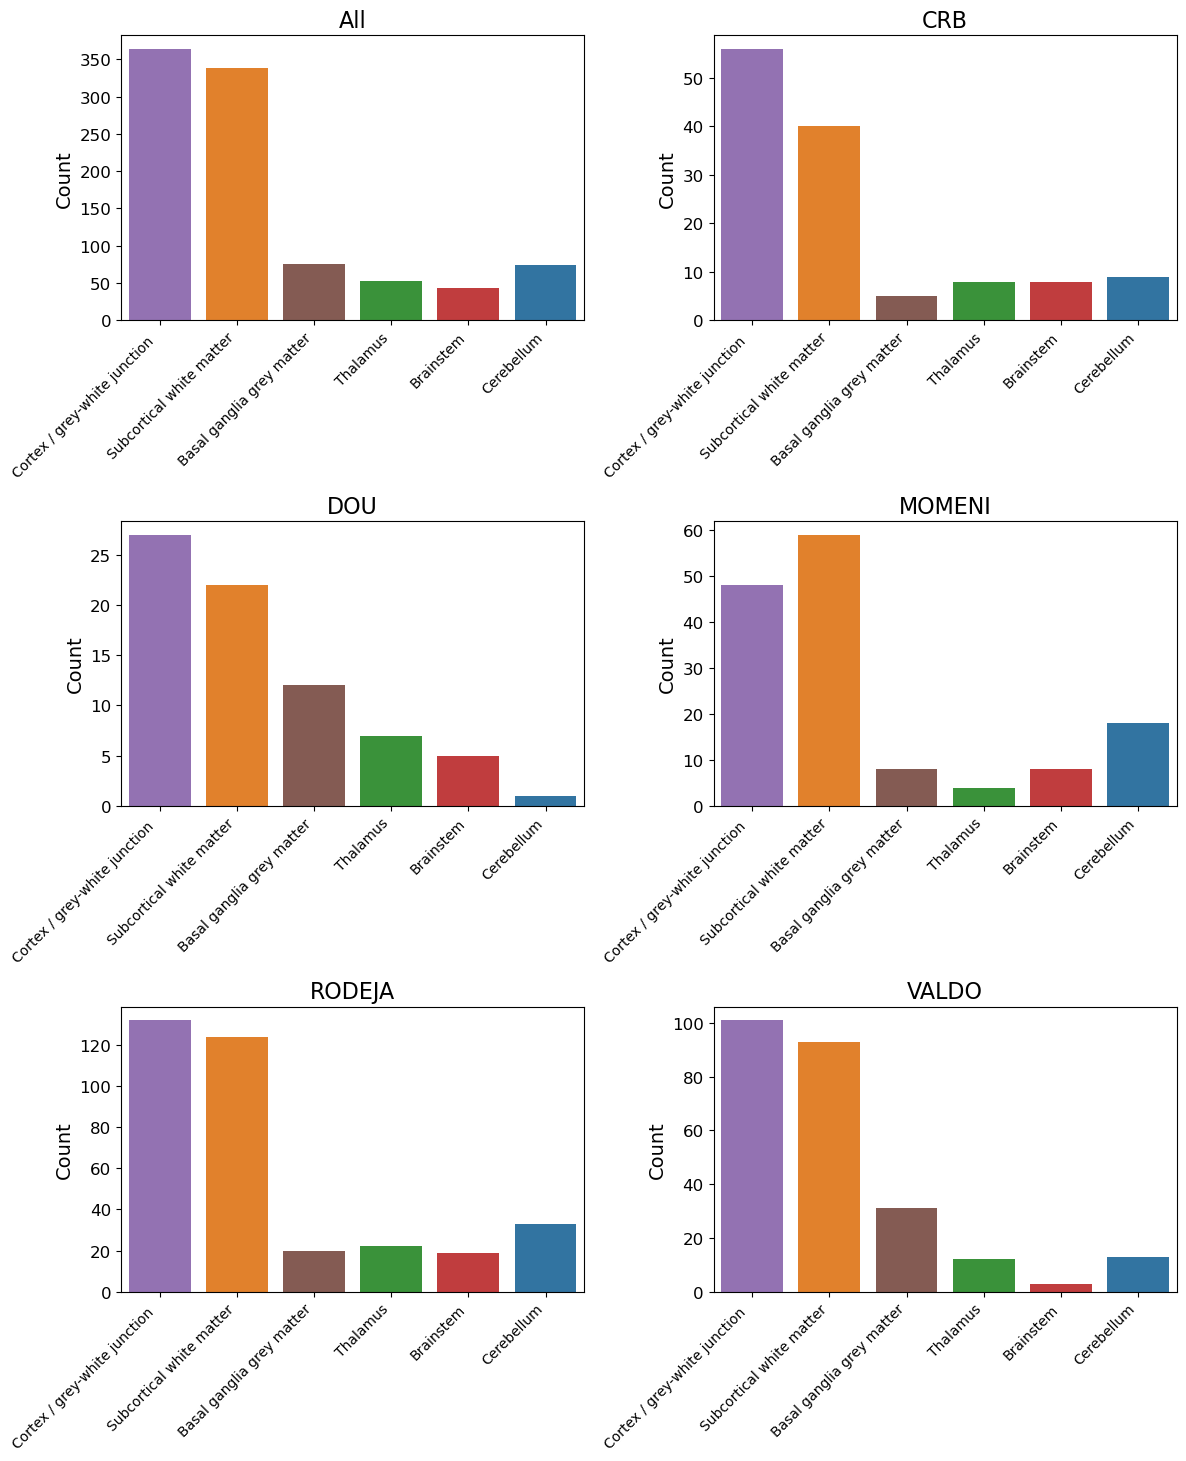

In [35]:
# Adding an 'All' category for aggregated data
df_location_plotting = pd.concat([df_location_enriched, pd.DataFrame({'BOMBS_label': df_location_enriched['BOMBS_label'], 'Dataset': 'All'})])

# Filter those with no possible mapping to
df_location_plotting = df_location_plotting[df_location_plotting['BOMBS_label'] != 'NN']

# Create a consistent color palette
unique_labels = df_location_plotting['BOMBS_label'].unique()
palette = sns.color_palette("tab10", len(unique_labels))  # A nicer color palette
color_mapping = dict(zip(unique_labels, palette))

# Sort datasets alphabetically, 'All' will be automatically last because of concatenation
datasets = sorted(df_location_plotting['Dataset'].unique())

# Define a fixed order for the labels
fixed_label_order = [
    'Cortex / grey-white junction ', 'Subcortical white matter', 
        'Basal ganglia grey matter', 'Thalamus', 'Brainstem', 'Cerebellum', 
]
# Plot setup
fig, axs = plt.subplots(3, 2, figsize=(12, 16))  # Adjust grid size for 6 plots
axs = axs.flatten()

for i, dataset in enumerate(datasets):
    # Filter the data for the current dataset
    subset = df_location_plotting[df_location_plotting['Dataset'] == dataset]
    
    # Calculate the counts and convert to percentage
    total = subset['BOMBS_label'].count()  # Total count for the dataset
    label_counts = subset['BOMBS_label'].value_counts().reindex(fixed_label_order, fill_value=0)
    label_counts = pd.DataFrame({'BOMBS_label': label_counts.index, 'Count': label_counts.values})
    label_counts['Percentage'] = (label_counts['Count'] / total) * 100  # Calculate percentage

    # Ensure all labels are represented even if some have 0 counts
    label_counts = label_counts.fillna(0)
    label_counts = label_counts

    # Plot
    barplot = sns.barplot(x='BOMBS_label', y='Count', data=label_counts, ax=axs[i], palette=color_mapping)
    axs[i].set_title(f'{dataset}', fontsize=16)  # Increase font size for subplot titles
    axs[i].set_xlabel('', fontsize=14)  # Set font size for x-axis label
    # axs[i].set_ylim(0, 200)  # Adjust Y-axis limits if needed
    axs[i].set_ylabel('Count', fontsize=14)  # Set font size for y-axis label
    axs[i].tick_params(axis='x', rotation=45, labelsize=10)  # Set font size for x-axis tick labels
    axs[i].tick_params(axis='y', labelsize=12)  # Set font size for y-axis tick labels
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha="right", fontsize=10)  # Explicitly set font size for tick labels

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for suptitle

plt.savefig("../../data-misc/img/CMB_locations_barplot.png")
plt.show()
